In [42]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency, chi2

uploading Data science salaries from the local directory

In [43]:
df = pd.read_csv(r"C:/Users/test/Documents/tochora/baba/ds_salaries.csv", )
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [44]:
# dataset info
df.info

<bound method DataFrame.info of      Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD        

In [45]:
# shape of the dataset
df.shape

(607, 12)

the dataset has 607 rows and 12 columns

In [46]:
# missing values
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There are non-null values in the dataset

In [47]:
# names of the columns in the dataset
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [48]:
# salary currencies and thir counts
df.salary_currency.value_counts().head(7)

USD    398
EUR     95
GBP     44
INR     27
CAD     18
JPY      3
PLN      3
Name: salary_currency, dtype: int64

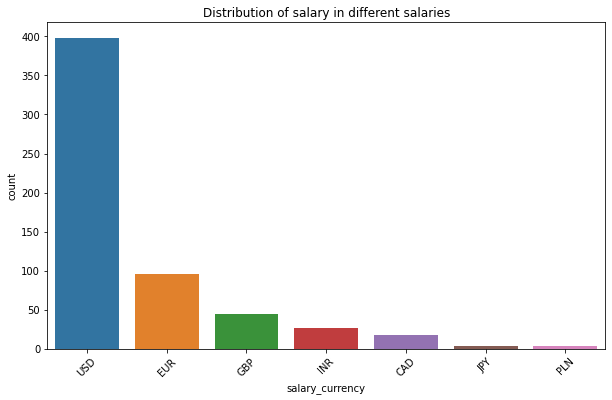

In [49]:
plt.figure(figsize=(10, 6))
currencies =sns.countplot(x='salary_currency', data=df, order=df['salary_currency'].value_counts().index[:7])
currencies.set_xticklabels(currencies.get_xticklabels(), rotation=45)
plt.title('Distribution of salary in different salaries')
plt.show()

Most of the salary_currency was in Us dollars since it has the highest distribution while Japanaese yen and PLN formed the lowest distribution thus forming a small composition of total salary_currency.

In [50]:
# dropping the salary column so that i can use salary_in _usd column
df.drop(columns=['salary'], axis=1, inplace=True)

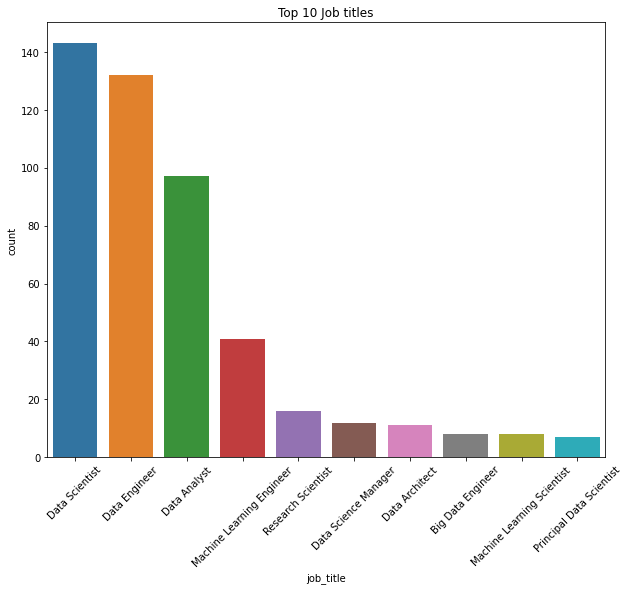

In [51]:
# Distribution of job titles
plt.figure(figsize=(10, 8))
titles = sns.countplot(x='job_title', data=df, order=df['job_title'].value_counts().index[:10])
titles.set_xticklabels(titles.get_xticklabels(), rotation=45)
plt.title('Top 10 Job titles')
plt.show()

Data science forms the largest proportion of job titles.
Principal Data science forms the lowest number of job titles in the top 10 job titles. from machine learning Engineer to Principal Data scientist shows the small distribution of job titles but in a decresing manner.
Conclusion:
the job market is dominated by Data scientists, Data engineers, Data analysts and machine learning engineers.

In [52]:
#top 10 countries where employees live
df.employee_residence.value_counts().head(10)

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
Name: employee_residence, dtype: int64

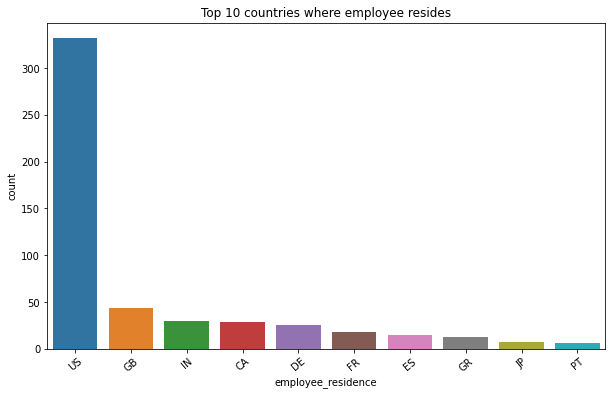

In [53]:
# Distribution of countries where employees reside 
plt.figure(figsize=(10, 6))
employee_residences = sns.countplot(x='employee_residence', data=df, order=df['employee_residence'].value_counts().index[:10])
employee_residences.set_xticklabels(employee_residences.get_xticklabels(), rotation = 40)
plt.title('Top 10 countries where employee resides')
plt.show()

The United States of America has the highest distribution of employee residences with more than 300 entries.Great Britain comes second with almost 50 entries.The rest forms small distribution of employees residences.
Conclusion:
The USA has the highest employee residences while the rest forms smaller distributions of the employee residences.

In [54]:
# locations where the companies are situated and their counts
df.company_location.value_counts().head(10)

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
Name: company_location, dtype: int64

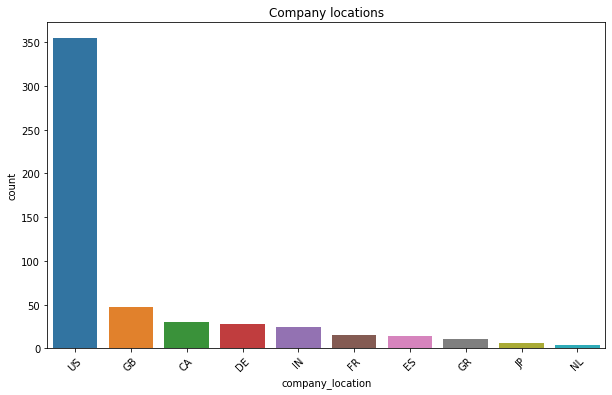

In [55]:
# Distribution of company locations
plt.figure(figsize=(10, 6))
company_locations = sns.countplot(x='company_location', data=df, order=df['company_location'].value_counts().index[:10])
company_locations.set_xticklabels(company_locations.get_xticklabels(), rotation=45)
plt.title('Company locations')
plt.show()

The USA forms the highest distribution of company locations follwed by Great Britain.The Netherlands forms the smallest distribution in the top 10 catgories of company locations. The rest of the countries forms small distribution of company locations.
conclusions:
The USA  is where most companies are situated while Netherland have the lowest number of comapaies.

In [56]:
# employment types and their counts
df.employment_type.value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

FT stands for Fulltime, PT stands for Parttime, CT stands for contractual, FL stands for fulltime

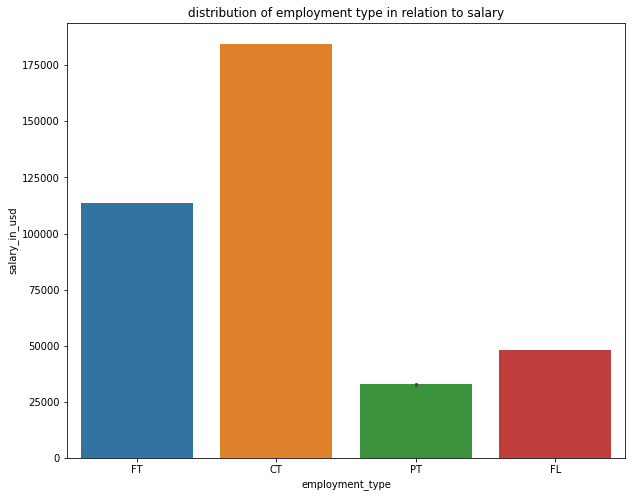

In [57]:
plt.figure(figsize=(10, 8))
sns.barplot(x=df['employment_type'], y=df['salary_in_usd'], ci=0.4)
plt.title('distribution of employment type in relation to salary')
plt.show()

FullTime employment_type has the highest distribution  while partime has the smallest distribution in relation to salary.
Conclusions:
Employees who worked in contractual jobs earned the highest salary followed by those doing fulltime jobs.employees who worked partime got the smallest job.

In [58]:
# comapny sizes and their counts
df.company_size.value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

Key difinitions:
M stands for medium sized companies,
 L stands for large companes,
   S stands for small companies

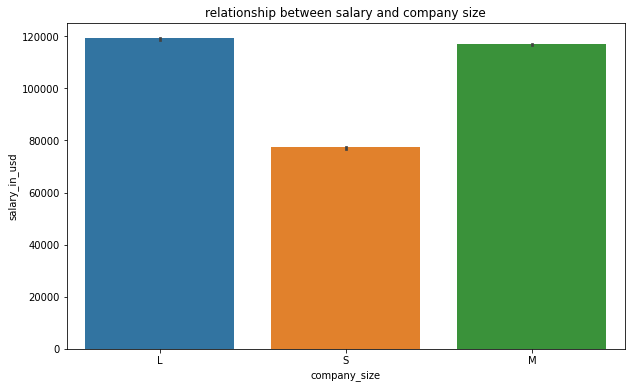

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['company_size'], y=df['salary_in_usd'], ci=5)
plt.title('relationship between salary and company size')
plt.show()

Large companies paid the largest salary of almost 120000 US dollars while small companies paid the lowest salary of approximately 80000 US dollars.
conclusion:
Large companies paid the highest salary possibly due to capital and income incentives while smallest companies paid the lowest salary due to contracted financial muscles.

In [60]:
# expereince levels with their counts
df.experience_level.value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

key definitions:
SE stands for senior expert, 
 MI stands for mid level,
  EN stands for entry level,
  EX stands for exper,

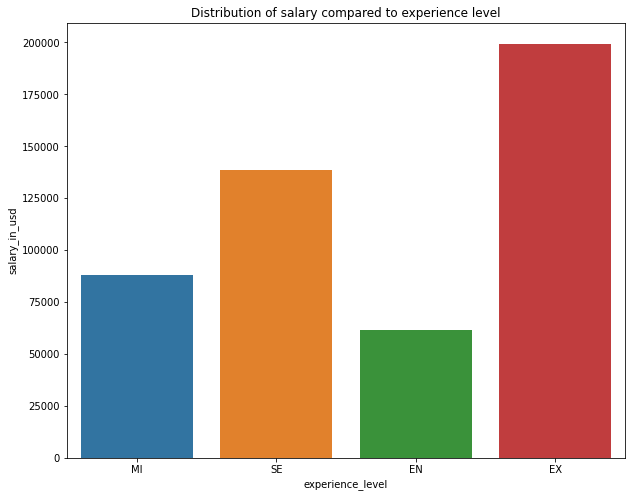

In [61]:
plt.figure(figsize=(10, 8))
sns.barplot(x=df['experience_level'], y=df['salary_in_usd'], ci=0.05)
plt.title('Distribution of salary compared to experience level')
plt.show()

Experts made the highest salary of above 150000 Us dollars while entry level/juniours made the smallest salary of slightly above 50000 US dollars.
conclusion:
Experts made the highest salary due to their high skills while juniours made lowest salary as thy were inexperienced and required mentorship.

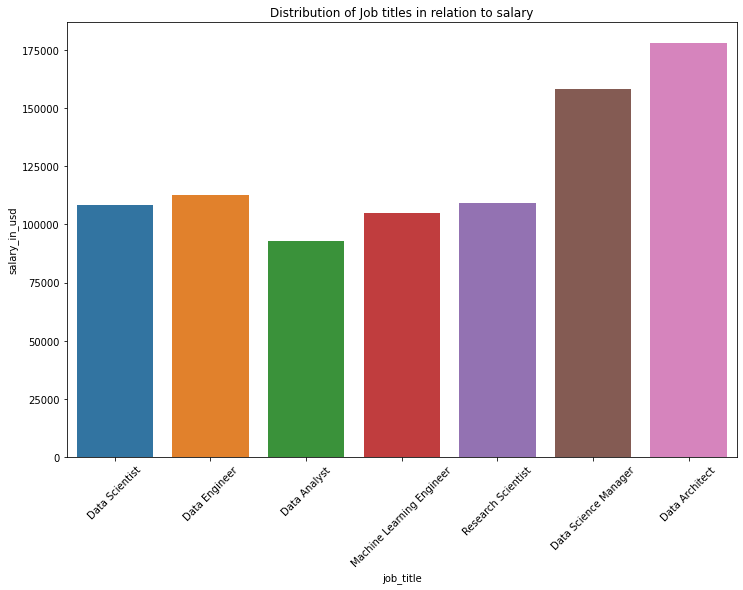

In [62]:
plt.figure(figsize=(12, 8))
jobs = sns.barplot(x='job_title', y='salary_in_usd', data=df, order=df['job_title'].value_counts().index[:7], ci=0.04)
jobs.set_xticklabels(jobs.get_xticklabels(), rotation=45)
plt.title('Distribution of Job titles in relation to salary')
plt.show()

Data architects made the highest salary of approximately 175000 US dollars while Data Analyst made the lowest salary of approximately 100000 US dollars.

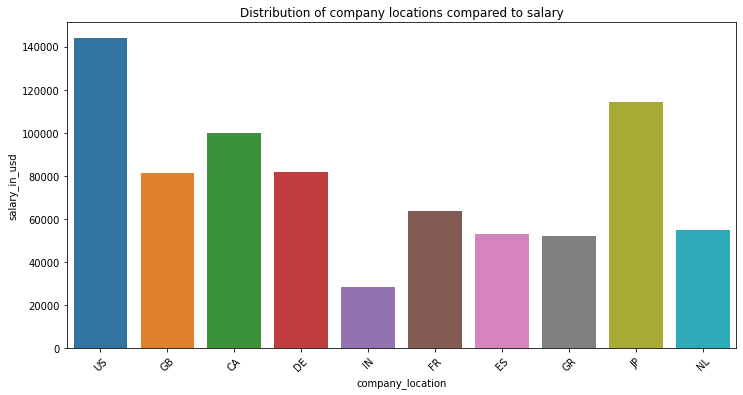

In [63]:
plt.figure(figsize=(12, 6))
experience = sns.barplot(x='company_location', y='salary_in_usd', data=df, order=df['company_location'].value_counts().index[:10], ci=0.02)
experience.set_xticklabels(experience.get_xticklabels(), rotation=45)
plt.title('Distribution of company locations compared to salary')
plt.show()

companies that are situated in USA payed the highest salary while those in India paid the lowest salary.In Japan, companies paid 2nd highest salary to employees after those in USA.
conclusion:
companies in USA may have paid higher salaries due to either higher profits or legislation stating mimimum salary requirment.india may have paid low salary due lack of legislation stating minimum salary requirement or lower incomes by the companies.


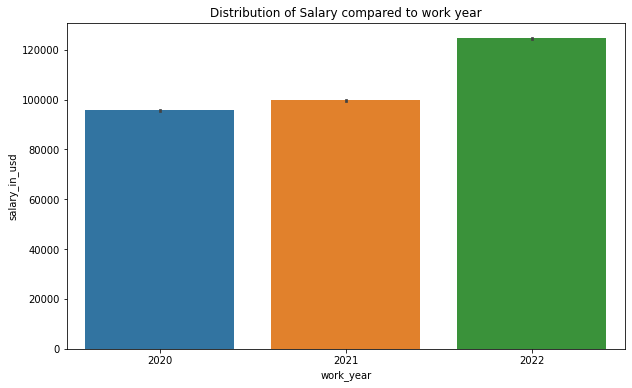

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['work_year'], y=df['salary_in_usd'], ci=2)
plt.title('Distribution of Salary compared to work year')
plt.show()

The highest salary was recorded in 2022 while the the lowest was in 2020.
Salary had been increasing from 2020 to 2022.
conclusion:
salary is highest in 2022 due to recovery in economic activities from effects of covid_19 leading increased profits.low salary was recoreded in 2020 possibly due to covid_19 that lead to shutdowns and reduced economic activities thus less income by companies.

In [65]:
# data types in columns in the dataset
df.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [66]:
# dropping columns unimportant in the dataset
df.drop(columns=['salary_currency', 'Unnamed: 0', 'remote_ratio'], axis=1, inplace=True)

In [67]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,US,L


In [68]:
# creating a dataframe for salary in relation to company size
salary_comp = pd.DataFrame(columns= ['S', 'M', 'L'])
count = 0
for i in salary_comp:
    sample_ = df['salary_in_usd'].loc[df['company_size']==i]
    sample_ = np.array([np.mean(sample_.sample(20).values) for j in range(50)])
    salary_comp[i] = sample_
    count += 1
salary_comp.head()

,S,M,L
0,72311.80,132836.15,108624.25
1,88966.70,98778.05,97851.75
2,50586.80,117600.75,151846.75
3,75846.15,124823.35,170312.75
4,88363.25,114978.95,131185.85


Conducting shapiro test to test normality of salary in small, medium sized and large comapnies

In [69]:
alpha = 0.05
for i in salary_comp:
    shapiro, p = stats.shapiro(salary_comp[i])
    print(f'Critical value (shapiro based) ({i}) = ({shapiro:4f}), p-value = ({p:4f})')
    if (p < alpha):
        print('Normality test is not passed')
    else:
        print('normality test passed')

Critical value (shapiro based) (S) = (0.971380), p-value = (0.263148)
normality test passed
Critical value (shapiro based) (M) = (0.980827), p-value = (0.587339)
normality test passed
Critical value (shapiro based) (L) = (0.990237), p-value = (0.951549)
normality test passed


 Conducting one way Anova test to determine if there is signifiacnt difference between mean of salary and company size

In [70]:
f, w = stats.f_oneway(salary_comp.S, salary_comp.M, salary_comp.L)
print(f'p-value = ({p:.2f}, alpha = ({alpha:.2f}))')
if (p > alpha):
    print('p-value > alpha reject ho')
    print('there is significance difference between salary and company size')
else:
    print('There is no significant difference between salary and company size')

p-value = (0.95, alpha = (0.05))
p-value > alpha reject ho
there is significance difference between salary and company size


In [71]:
#mean of salary
mean_ = df['salary_in_usd'].mean()

In [72]:
# normalizing and categorizing salary
lst_salary_rank = []
lst_salary_rank_ = []
for s in df.salary_in_usd:
    if (s < mean_):
        lst_salary_rank.append('Normal')
        lst_salary_rank_.append(0)
    if (s >= mean_):
        lst_salary_rank.append('High')
        lst_salary_rank_.append(1)
df['Salary_rank'] = lst_salary_rank
df.head()


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,company_location,company_size,Salary_rank
0,2020,MI,FT,Data Scientist,79833,DE,DE,L,Normal
1,2020,SE,FT,Machine Learning Scientist,260000,JP,JP,S,High
2,2020,SE,FT,Big Data Engineer,109024,GB,GB,M,Normal
3,2020,MI,FT,Product Data Analyst,20000,HN,HN,S,Normal
4,2020,SE,FT,Machine Learning Engineer,150000,US,US,L,High


In [73]:
# selecting appropriate columns necessary variables appropriate for prediction
dff = df[['experience_level', 'employee_residence', 'employment_type', 'job_title', 'company_location', 'company_size',
'Salary_rank']]
dff.head()

,experience_level,employee_residence,employment_type,job_title,company_location,company_size,Salary_rank
0,MI,DE,FT,Data Scientist,DE,L,Normal
1,SE,JP,FT,Machine Learning Scientist,JP,S,High
2,SE,GB,FT,Big Data Engineer,GB,M,Normal
3,MI,HN,FT,Product Data Analyst,HN,S,Normal
4,SE,US,FT,Machine Learning Engineer,US,L,High


In [74]:
# getting dummies for categorical data
dff = pd.get_dummies(dff, drop_first=True)
dff.head()

,experience_level_EX,experience_level_MI,experience_level_SE,employee_residence_AR,employee_residence_AT,employee_residence_AU,employee_residence_BE,employee_residence_BG,employee_residence_BO,employee_residence_BR,...,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S,Salary_rank_Normal
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [75]:
# splitting the dataset into x and y variables
x = dff.drop(columns=['Salary_rank_Normal'])
y = dff['Salary_rank_Normal']

In [76]:
# applying standard scaler to standardize data in the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# splitting x and y variables into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=20)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [77]:
# modelling
from  sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# fitting our model
lr.fit(x_train, y_train)
acc = lr.score(x_test, y_test)
print(acc)
pred = lr.predict(x_test)

0.8114754098360656


our model has an accuracy of 81%

In [78]:
# classifiation report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        52
           1       0.82      0.86      0.84        70

    accuracy                           0.81       122
   macro avg       0.81      0.80      0.81       122
weighted avg       0.81      0.81      0.81       122



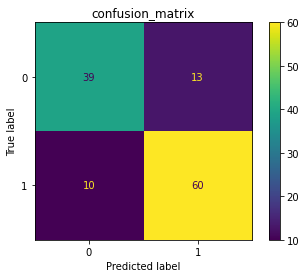

In [79]:
cm = confusion_matrix(pred, y_test, labels=lr.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
display.plot()
plt.title('confusion_matrix')
plt.show()